In [1]:
import os 
import cv2
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import datasets, layers, models


import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Cover image location
cover_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset Cover Images"
cover_grey_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset Cover Images Greyscale"
lsb_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset LSB"
lsbg_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset LSB Greyscale"

In [3]:
# Combine cover image data into the single array
cover_data = []
for i, filename in enumerate(os.listdir(cover_dir)):
    cover_image = cv2.imread(cover_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    cover_data.append(cover_image)
# The length of the array should be 60
print(len(cover_data))

60


In [4]:
# Combine stego image data into the single array
stego_data = []
for i, filename in enumerate(os.listdir(lsb_dir)):
    stego_image = cv2.imread(lsb_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    stego_data.append(stego_image)
# The length of the array should be 60
print(len(stego_data))

60


In [5]:
# Combine cover and stego images with corresponding labels 
labeled_data = []
for instance in cover_data:
    labeled_data.append([instance, 0])
for instance in stego_data:
    labeled_data.append([instance, 1])
len(labeled_data)

120

In [6]:
type(labeled_data[1][0])

numpy.ndarray

Text(0.5, 1.0, '0')

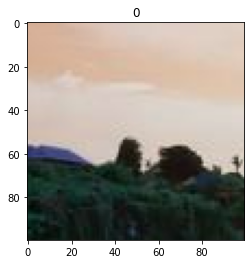

In [7]:
plt.imshow(np.array(labeled_data[1][0]).reshape(100,100,3))
plt.title(labeled_data[0][1])

In [8]:
# Separate labels from data
X = []
Y = []
for img, label in labeled_data:
    X.append(img)
    Y.append(label)

In [9]:
print(len(X))
print(len(Y))

120
120


<AxesSubplot:ylabel='count'>

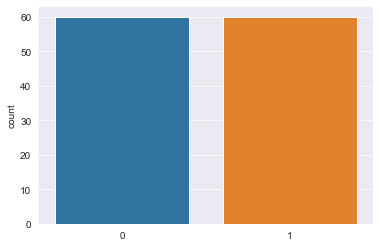

In [10]:
sns.set_style('darkgrid')
sns.countplot(x = Y)

In [11]:
# Training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [13]:
# Normalise data
x_train = x_train / 255.0
x_test = x_test / 255.0

<AxesSubplot:ylabel='count'>

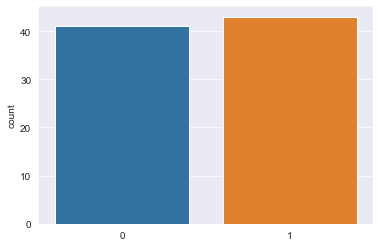

In [14]:
sns.countplot(x = y_train)

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
3/3 [==============================] - 2s 339ms/step - loss: 1.7141 - accuracy: 0.3452
Epoch 2/10
3/3 [==============================] - 1s 380ms/step - loss: 1.0205 - accuracy: 0.4405
Epoch 3/10
3/3 [==============================] - 1s 336ms/step - loss: 0.8618 - accuracy: 0.4881
Epoch 4/10
3/3 [==============================] - 1s 315ms/step - loss: 0.8311 - accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 1s 311ms/step - loss: 0.7105 - accuracy: 0.5714
Epoch 6/10
3/3 [==============================] - 1s 315ms/step - loss: 0.7490 - accuracy: 0.5119
Epoch 7/10
3/3 [==============================] - 1s 326ms/step - loss: 0.7335 - accuracy: 0.4881
Epoch 8/10
3/3 [==============================] - 1s 319ms/step - loss: 0.7030 - accuracy: 0.4881
Epoch 9/10
3/3 [==============================] - 1s 321ms/step - loss: 0.7050 - accuracy: 0.5119
Epoch 10/10
3/3 [==============================] - 1s 341ms/step - loss: 0.6891 - accuracy: 0.5238


Text(0, 0.5, 'Accuracy')

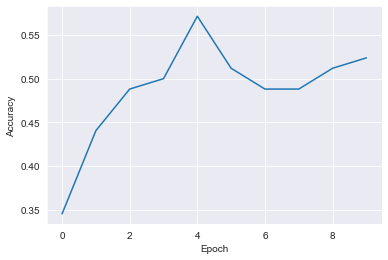

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

2/2 - 0s - loss: 0.7140 - accuracy: 0.4167
